# This notebook compares the V15 and V20 prediction errors for different bitstrings/categories

### Load the data

In [1]:
import pandas as pd
df = pd.read_pickle('tmp_data/clean_yearly_data.pkl')

### Create a plotting function

In [258]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 


def RobinsonPlot(df,z,vmin,vmax,cmap,markersize,savefig,ncircles):


    #Setup plotting env
    fig = plt.figure(figsize=[30,20])
    ax = plt.subplot(projection=ccrs.Robinson(central_longitude=0))
    cax = fig.add_axes([0.32, 0.11, 0.4, 0.0125])

    #Get data
    x = df['latitude_ERA']
    y = df['longitude_ERA']
    z1 = df[z]
    
    
    #Normalise
    norm = mc.Normalize(vmin=vmin, vmax=vmax)

    #Colorbar
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                               norm=norm,
                               orientation='horizontal'
                               )
    #Scatter points
    sc = ax.scatter(y,x,transform=ccrs.PlateCarree(),
                    s=markersize,
                    c=cmap(norm(z1)),
                    linewidths=1, 
                    alpha=.7)


    #Latitude cutoffs
    ax.plot([-180,180],[70,70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')
    ax.plot([-180,180],[-70,-70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')


    
    #Formatting
    cax.tick_params(labelsize=30)
    cax.set_xlabel(r'$\delta_{\rm V20}$ (K)',fontsize=34)
    

    ax.coastlines()
    ax.set_aspect('auto') #Force projection aspect ratio
    
    ax.scatter(180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.
    ax.scatter(-180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.

    #ax.scatter(180,0,c='k')

    #ax.set_xlim(-180,180)
    
    
    
    
    
    #Extra circles
    row = df.sort_values(by=['delta'],ascending=False).iloc[0:ncircles]
    xsel = row['latitude_ERA']
    ysel = row['longitude_ERA']
    
    sc_extra = ax.scatter(ysel,xsel,transform=ccrs.PlateCarree(),
                          s=200, facecolors='none', edgecolors='C2',lw=2
                          )

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    
    
    
    
    

## Lake

,latitude_ERA,longitude_ERA,delta
16641,-21.779853,-52.148148,8.565804
38233,-2.388758,-54.562500,5.517063
71529,24.028095,69.000000,5.123649
101086,41.170945,-113.400000,4.876928
89090,34.145187,6.080000,2.532175
24181,-15.316154,127.968750,2.315439
38369,-2.388758,36.000000,1.922324


-0.29865393

1650

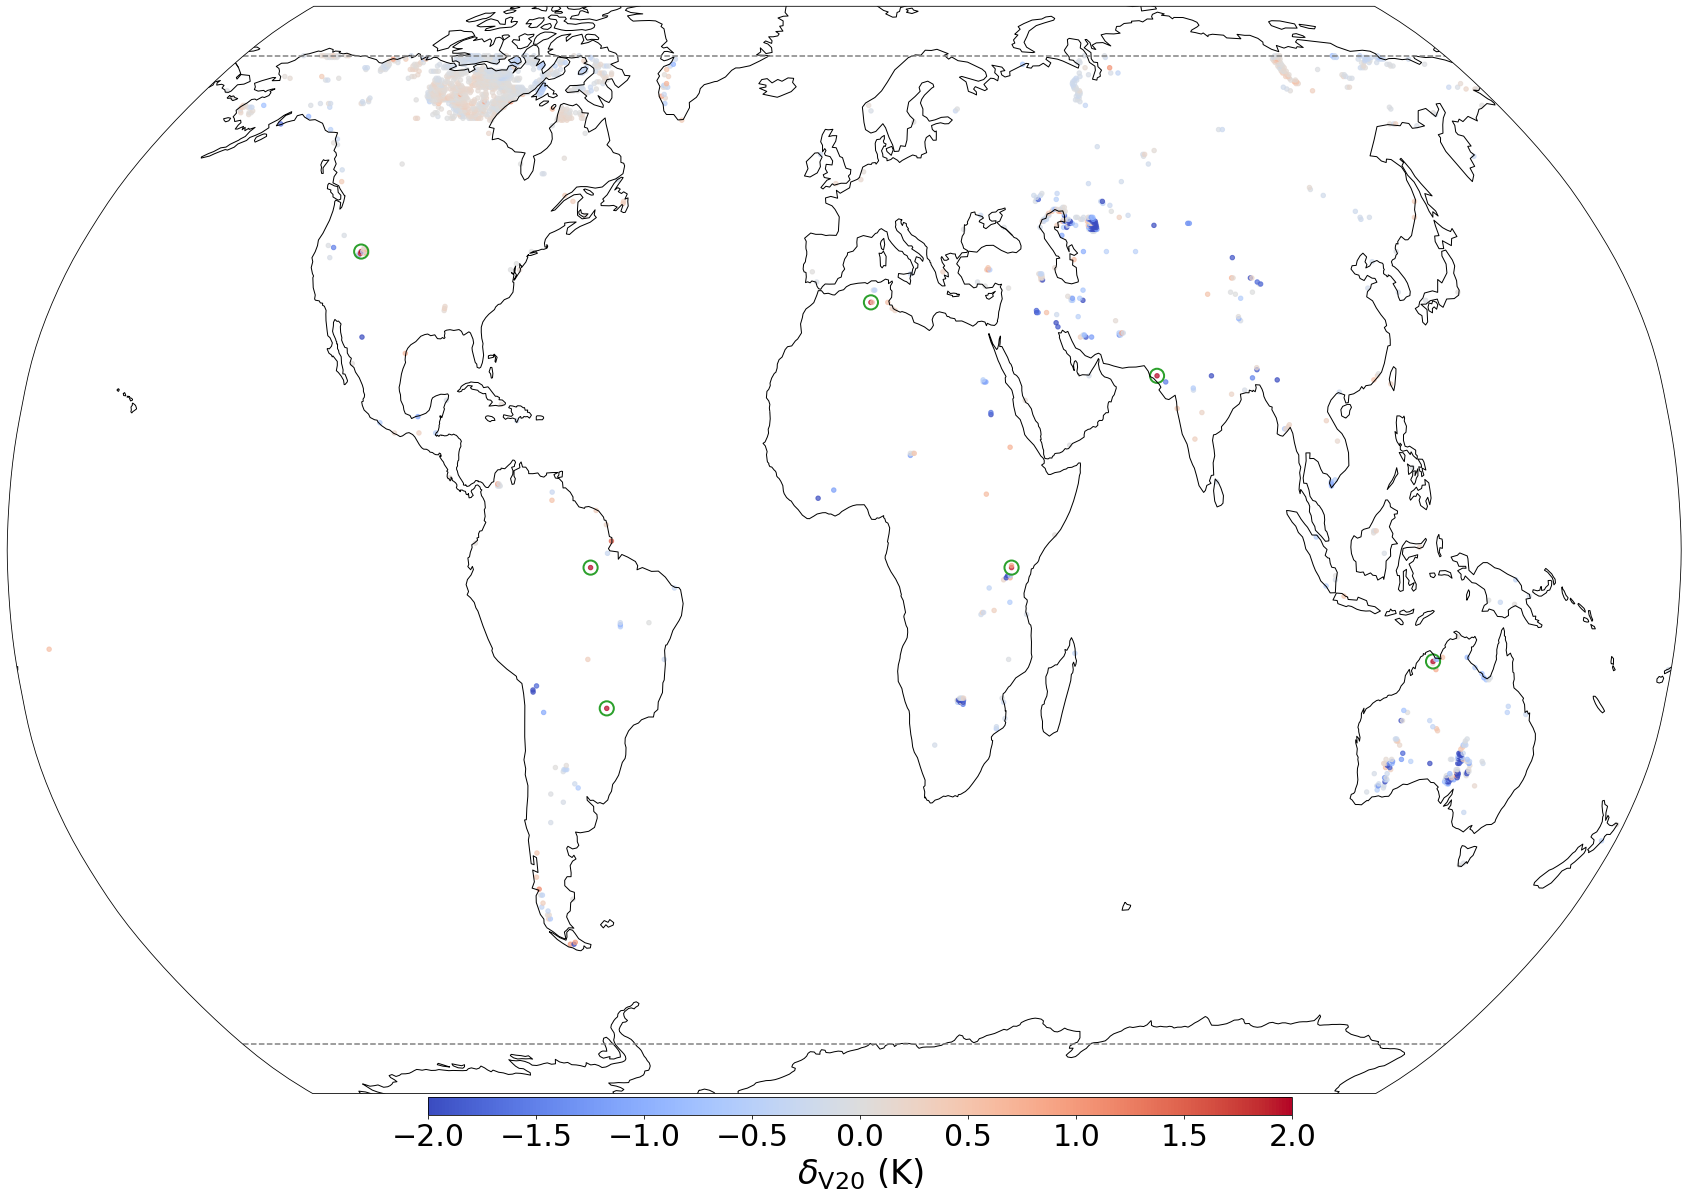

In [259]:
df_lake = df.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant')

n = 7
RobinsonPlot(df_lake,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig='figs/lake.png',ncircles=n)
display(df_lake.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])
display(df_lake.delta.mean())
display(len(df_lake))

,latitude_ERA,longitude_ERA,delta
71529,24.028095,69.00000,5.123649
101086,41.170945,-113.40000,4.876928
89090,34.145187,6.08000,2.532175
100584,40.889915,-113.40000,1.885526
42468,1.264637,-50.06250,1.491314
2298,-54.379367,-68.90625,0.946931
81787,29.929732,62.18750,0.932037


-0.77033347

546

latitude_ERA                      24.028095
longitude_ERA                          69.0
MODIS_LST                        313.732483
V15_prediction                   309.048828
V20_prediction                   303.119598
V20X_prediction                  301.872253
V15_error                           5.62142
V20_error                          10.74507
V20X_error                        11.894302
delta                              5.123649
deltaX                             6.272882
V15_clFr                            0.59056
V15_cvhFr                               0.0
V15_cvlFr                               0.0
V15_dl                             2.580078
V15_oceanFr                             0.0
V15_si10Fr                              0.0
V15_z                             23.542847
V20_clFr                           0.711941
V20_cvhFr                               0.0
V20_cvlFr                               0.0
V20_dl                             3.755859
V20_oceanFr                     

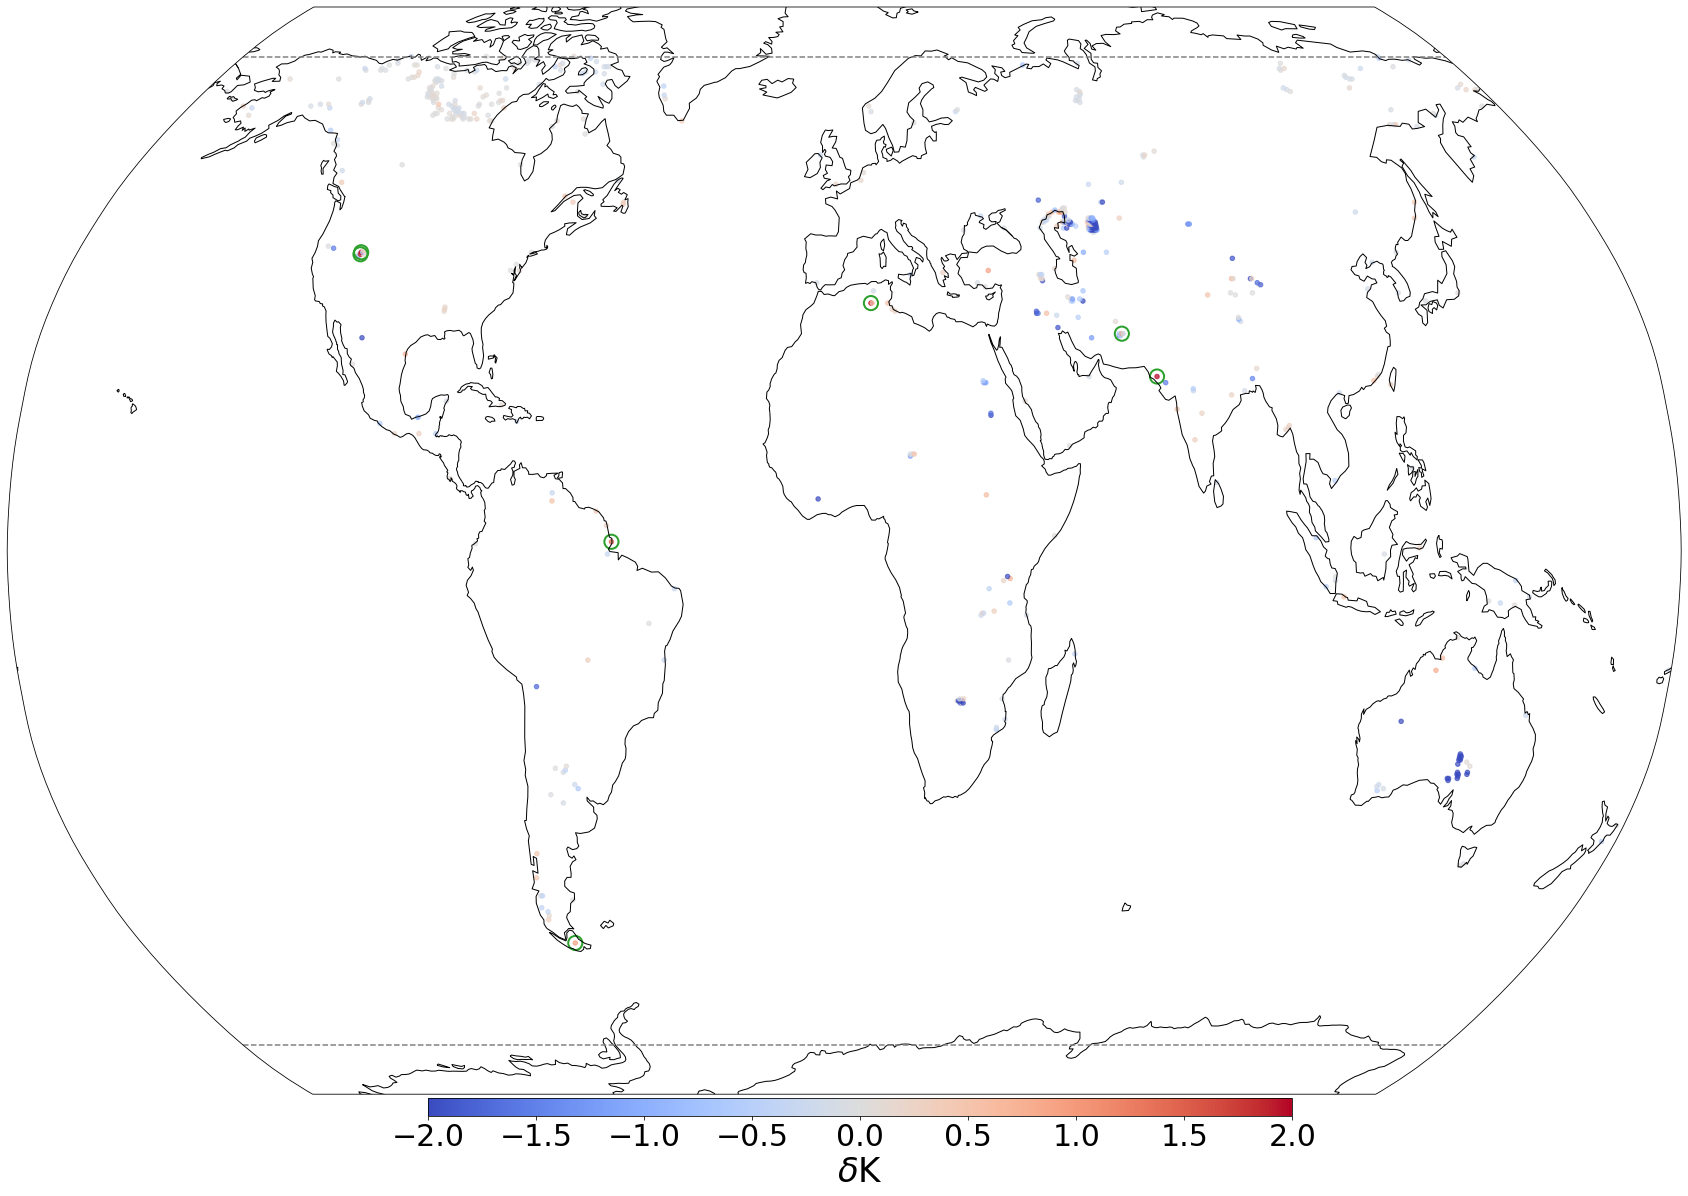

In [222]:
#df_lake2 = df.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant')
df_lake2 = df.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not cvhFr_change_is_significant & not cvlFr_change_is_significant')

n = 7
RobinsonPlot(df_lake2,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_lake2.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])
display(df_lake2.delta.mean())
display(len(df_lake2))
display(df_lake2.sort_values(by=['delta'],ascending=False).iloc[0]) #[['latitude_ERA','longitude_ERA','delta']])


## Vegetation

3.089121

58

latitude_ERA                      -0.983606
longitude_ERA                      98.71875
MODIS_LST                        299.748657
V15_prediction                   299.439484
V20_prediction                   311.325012
V20X_prediction                  300.483948
V15_error                          2.597664
V20_error                         11.576346
V20X_error                         2.598799
delta                              8.978683
deltaX                             0.001135
V15_clFr                                0.0
V15_cvhFr                          0.273668
V15_cvlFr                               0.0
V15_dl                                 25.0
V15_oceanFr                         0.47509
V15_si10Fr                              0.0
V15_z                             314.25769
V20_clFr                           0.000036
V20_cvhFr                               0.0
V20_cvlFr                               0.0
V20_dl                            128.74902
V20_oceanFr                     

-0.9836062576436776

98.71875

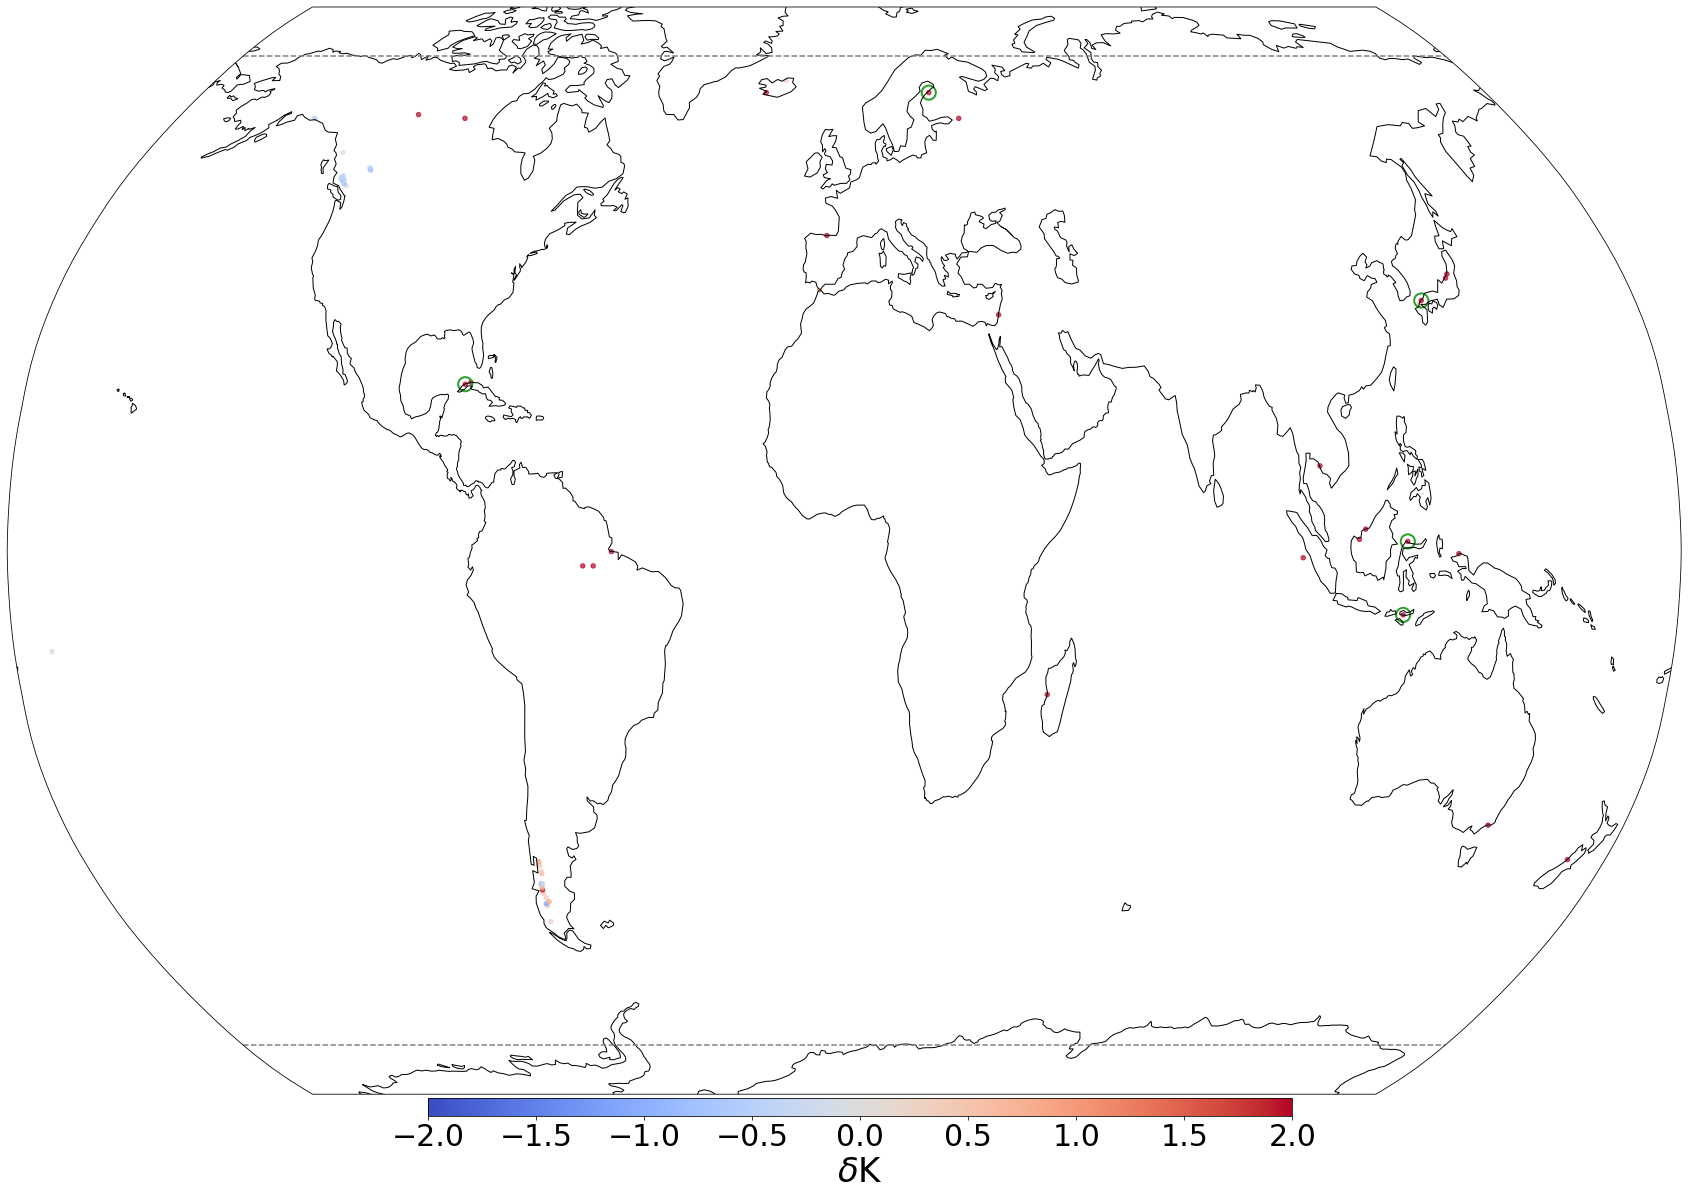

In [242]:
df_veg = df.query('cvhFr_change_is_significant & not clFr_change_is_significant')

n = 5
RobinsonPlot(df_veg,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
row = df_veg.sort_values(by=['delta'],ascending=False).iloc[7]#[['latitude_ERA','longitude_ERA','delta','V15_cvhFr','V20_cvhFr']])
display(df_veg.delta.mean())
display(len(df_veg))
display(row)
display(row.latitude_ERA)
display(row.longitude_ERA)


In [244]:
df_veg['change_in_cvh'] = df_veg['V15_cvhFr'] - df_veg['V20_cvhFr']

/home/k/kimpson/bin/conda/envs/workhorse/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [251]:
row = df_veg.query(' 60.90> latitude_ERA > 60.70 & delta > 0')#[['latitude_ERA','longitude_ERA','delta','V15_cvhFr','V20_cvhFr','change_in_cvh']]
row.iloc[0]#[['latitude_ERA','longitude_ERA','delta','V15_cvhFr','V20_cvhFr']])
display(row.latitude_ERA)
display(row.longitude_ERA)

135369    60.84306
Name: latitude_ERA, dtype: float64

135369   -115.555556
Name: longitude_ERA, dtype: float64

## Ice

latitude_ERA                        34.145187
longitude_ERA                           76.48
MODIS_LST                          280.302307
V15_prediction                     282.531372
V20_prediction                     286.755554
V20X_prediction                    286.522339
V15_error                            3.970255
V20_error                            6.675344
V20X_error                            6.37882
delta                                2.705089
deltaX                               2.408566
V15_clFr                                  0.0
V15_cvhFr                                 0.0
V15_cvlFr                            0.256899
V15_dl                                   25.0
V15_oceanFr                               0.0
V15_si10Fr                           0.162598
V15_z                            45555.355469
V20_clFr                             0.002123
V20_cvhFr                                 0.0
V20_cvlFr                            0.244419
V20_dl                            

-0.12768228

1057

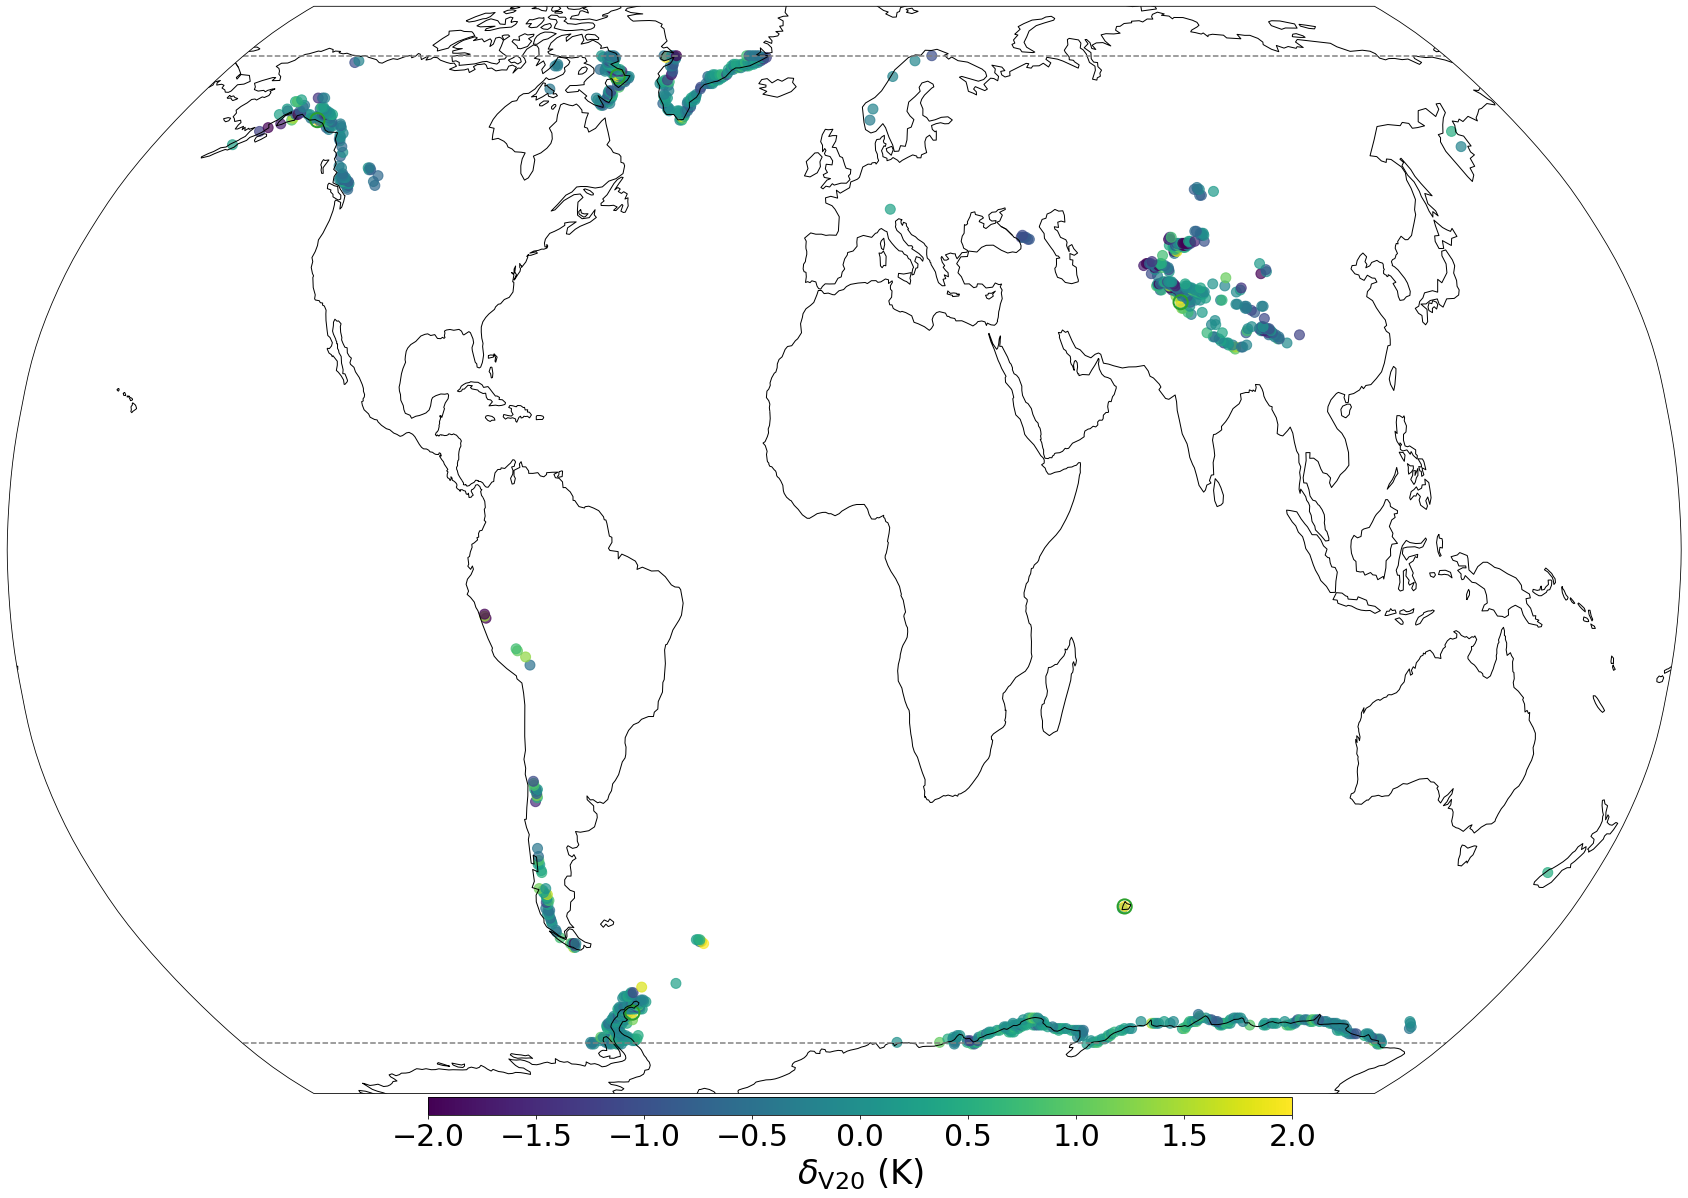

In [265]:
df_ice = df.query('si10Fr_change_is_significant ')
n = 5
RobinsonPlot(df_ice,'delta',vmin=-2,vmax=+2,cmap=plt.cm.viridis,markersize = 100,savefig=None,ncircles=n)
display(df_ice.sort_values(by=['delta'],ascending=False).iloc[3])#[['latitude_ERA','longitude_ERA','delta','V15_si10Fr','V20_si10Fr','V15_oceanFr','V20_oceanFr','V15_clFr','V20_clFr']])
display(df_ice.delta.mean())
display(len(df_ice))



## Deepdive

Now lets look at some particular points


## Deepdive - Lake bad points


In [260]:
#0 = Brazil 1, south
#1 = Brazil 2, north
#2 = Gujarat
#3 = SLC
#4 = Chott Melrhir
#5 = Australia
#6 = Lake Natron
n=4
display(df_lake.sort_values(by=['delta'],ascending=False).iloc[n]) #[['latitude_ERA','longitude_ERA','delta']])


latitude_ERA                      34.145187
longitude_ERA                          6.08
MODIS_LST                        309.881317
V15_prediction                   311.362732
V20_prediction                   316.291443
V20X_prediction                  310.715393
V15_error                          3.900536
V20_error                           6.43271
V20X_error                         4.158387
delta                              2.532175
deltaX                             0.257852
V15_clFr                           0.332777
V15_cvhFr                          0.001161
V15_cvlFr                          0.014613
V15_dl                             20.77832
V15_oceanFr                             0.0
V15_si10Fr                              0.0
V15_z                           -171.761841
V20_clFr                           0.000018
V20_cvhFr                          0.001739
V20_cvlFr                          0.021911
V20_dl                                  1.0
V20_oceanFr                     

In [261]:
lat = df_lake.sort_values(by=['delta'],ascending=False).iloc[n].latitude_ERA #[['latitude_ERA','longitude_ERA','delta']])
lon = df_lake.sort_values(by=['delta'],ascending=False).iloc[n].longitude_ERA #[['latitude_ERA','longitude_ERA','delta']])


In [262]:
lat

34.145187223212716

In [263]:
lon

6.0800000000000125

## Deepdive - Lake north



In [216]:
df_north_lake = df_lake.query('latitude_ERA > 50.0 & longitude_ERA > 90')

latitude_ERA                        69.273959
longitude_ERA                          128.25
MODIS_LST                          263.230011
V15_prediction                      262.57959
V20_prediction                     262.631897
V20X_prediction                    264.585632
V15_error                            4.271652
V20_error                             4.73029
V20X_error                           4.390966
delta                                0.458638
deltaX                               0.119314
V15_clFr                             0.397956
V15_cvhFr                                 0.0
V15_cvlFr                             0.52305
V15_dl                               5.135742
V15_oceanFr                               0.0
V15_si10Fr                                0.0
V15_z                            10244.648438
V20_clFr                             0.008603
V20_cvhFr                                 0.0
V20_cvlFr                            0.861331
V20_dl                            

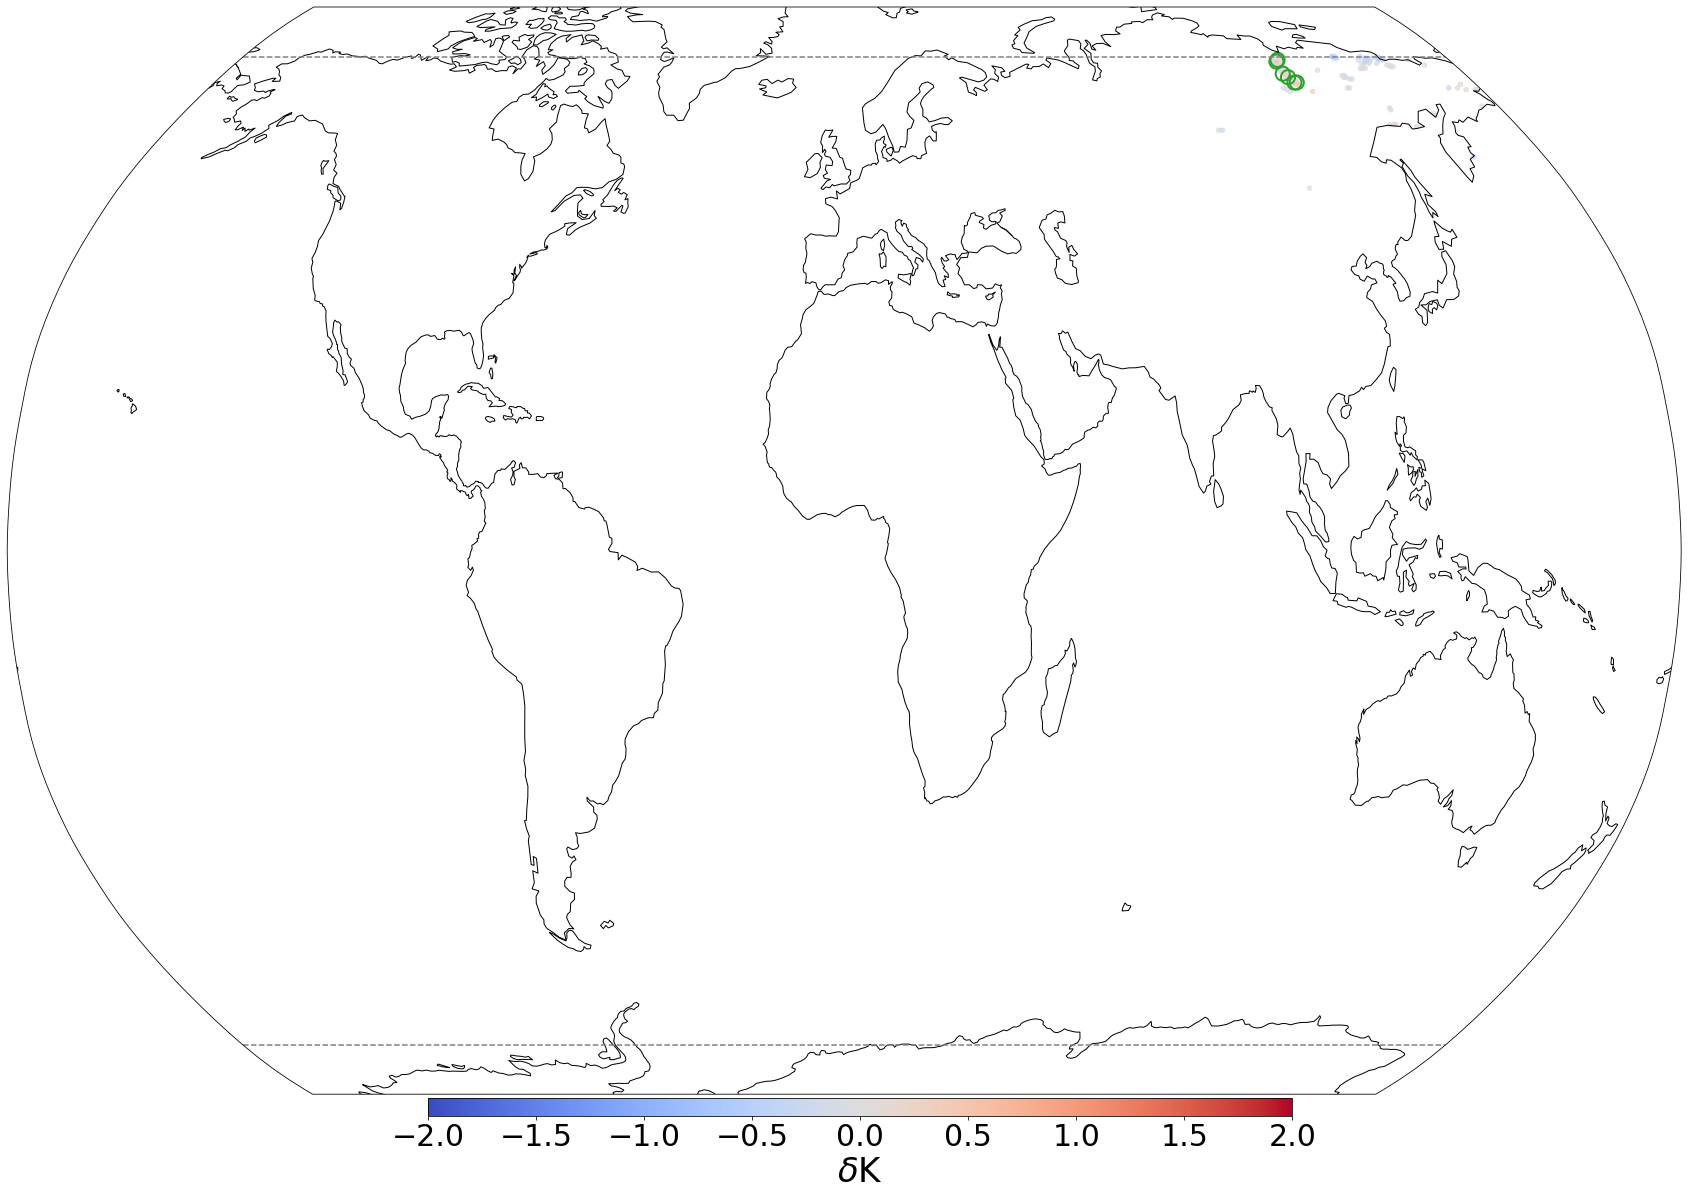

In [221]:
RobinsonPlot(df_north_lake,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_north_lake.sort_values(by=['delta'],ascending=False).iloc[3]) #[['latitude_ERA','longitude_ERA','delta']])
